In [1]:
# # Imports Standard librabries for Visualization,Statistics,chisquare
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats
from scipy.stats import chisquare 
from scipy.stats import chi2_contingency


In [2]:
# Load data set into Pandas dataframe and read first two rows including header
df = pd.read_csv('churn_raw_data.csv')
df.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [3]:
# Remove redundant "Unnamed" column at beginning & display first two records
df = df.drop(df.columns[0], axis = 1)
df.head(2)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [4]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'item1':'Timely_Responses',
'item2':'Timely_Fixes',
'item3':'Timely_Replacements',
'item4':'Reliability',
'item5':'Options',
'item6':'Respectful_Response',
'item7':'Courteous_Exchange',
'item8':'Active_Listening'},
inplace=True)

<span style="color:Blue"><b> Data Cleaning </b></span>

In [5]:
#Check remaining columns in new dataset and remove unwanted columns if required
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening'],
      dtype='object')

In [6]:
#we should also check count of missing values as well "NA" presence in dataset.
data_with_nulls = df.isnull().sum() 
data_with_na=df.isna().any()
print(data_with_nulls)
print(data_with_na)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [7]:
# Identify duplicate rows in the dataframe and remove if required
duplicates_data_rows = df.loc[df.duplicated()]
print(duplicates_data_rows)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Timely_Responses, Timely_Fixes, Timely_Replacements, Reliability, Options, Respectful_Response, Courteous_Exchange, Active_Listening]
Index: []

[0 rows x 51 columns]


In [8]:
# find out columns with invalid values or misspelling in case of catergorial data.
# This analysis will help later in analysis
print("Employment values \n",df['Employment'].unique())
print("Area values \n",df['Area'].unique())
print("Children values \n",df['Children'].unique())
print("Education values \n",df['Education'].unique())
print("Marital values \n",df['Marital'].unique())
print("Gender values \n",df['Gender'].unique())
print("Contract values \n",df['Contract'].unique())
print("PaymentMethod values \n",df['PaymentMethod'].unique())
print("age_range values \n",sorted(df['Age'].unique().astype(int)))

Employment values 
 ['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
Area values 
 ['Urban' 'Suburban' 'Rural']
Children values 
 [nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
Education values 
 ["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
Marital values 
 ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender values 
 ['Male' 'Female' 'Prefer not to answer']
Contract values 
 ['One year' 'Month-to-month' 'Two Year']
PaymentMethod values 
 ['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']
age_range values 
 [-2147483648, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44

In [9]:
# we found in above steps many missing data values for columns/features 
#Children, Age, Income, Tenure and Bandwidth_GB_Year
# Now its time to Impute missing fields  with median or mean
df['Children'] = df['Children'].fillna(df['Children'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

In [10]:
#RE-check count of missing values after imputing missing fields 
data_with_nulls = df.isnull().sum() 
print(data_with_nulls)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

### <span style="color:Blue"><b> Chi-Square Test</b></span>

In [11]:
marital_c=df['Marital'].value_counts()

In [12]:
print(marital_c)

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


In [13]:
chi = stats.chisquare(marital_c)
chi.pvalue

0.04728031294668998

In [14]:
# Is the result significant?
alpha = 0.05
if chi.pvalue < alpha:
    print("Reject null hypothesis & \nDifference between marital status is statistically significant->",chi.pvalue)
else:
    print("Accept null hypothesis and No significant difference between marital status found->",chi.pvalue)

Reject null hypothesis & 
Difference between marital status is statistically significant-> 0.04728031294668998


In [15]:
Employment_c=df['Employment'].value_counts()

In [16]:
print(Employment_c)

Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: Employment, dtype: int64


In [17]:
chi_employment = stats.chisquare(Employment_c)
chi_employment.pvalue

0.0

In [18]:
# Is the result significant?
alpha = 0.05
if chi_employment.pvalue < alpha:
    print("Reject null hypothesis & \nDifference between employment status is statistically significant->",chi.pvalue)
else:
    print("Accept null hypothesis and No significant difference between employment status found->",chi.pvalue)

Reject null hypothesis & 
Difference between employment status is statistically significant-> 0.04728031294668998


In [19]:
df['MonthlyCharge'].describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

In [20]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3397.166397
std       2072.718575
min        155.506715
25%       1312.130487
50%       3382.424000
75%       5466.284500
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [21]:
df['Timely_Responses'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Timely_Responses, dtype: float64

In [22]:
df['Reliability'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Reliability, dtype: float64

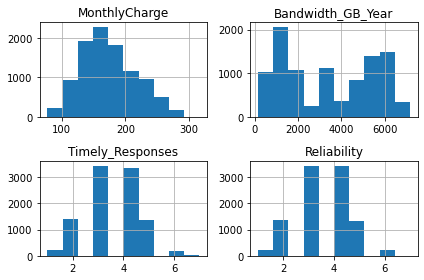

In [23]:
# Plotting  histograms of selected contiuous & categorical variables
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses', 'Reliability']].hist()
plt.savefig('churn_data_plot.jpg')
plt.tight_layout()

D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


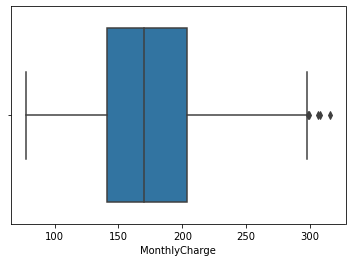

In [24]:
#Plotting Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = df)
plt.show()

D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


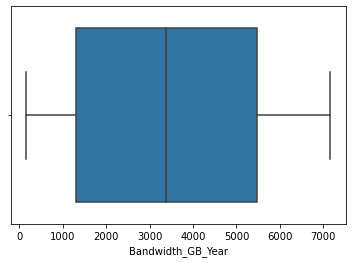

In [25]:
sns.boxplot('Bandwidth_GB_Year', data = df)
plt.show()

D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


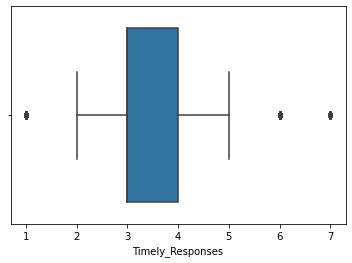

In [26]:
sns.boxplot('Timely_Responses', data = df)
plt.show()

D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


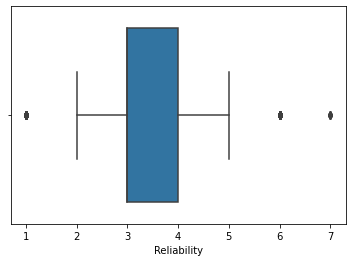

In [27]:
sns.boxplot('Reliability', data = df)
plt.show()

In [28]:
 # Create dataframe for heatmap bivariate analysis of correlation
churn_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year',
                      'Timely_Responses','Reliability']]

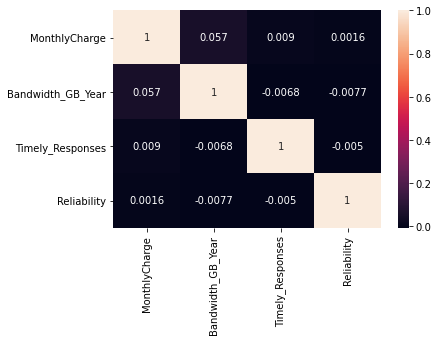

In [29]:
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

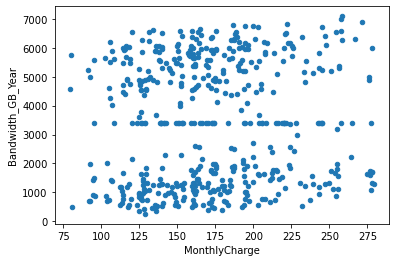

In [30]:
# scatter plot of continuous variables MonthlyCharge ,bandwidth_GB_Year
# Maximum value for Monthlycharge is 315.87 thats reason we used Monthlycharges < 300 
churn_bivariate[churn_bivariate['MonthlyCharge'] < 300].sample(500).plot.scatter(x='MonthlyCharge',y='Bandwidth_GB_Year')


<AxesSubplot:xlabel='Timely_Responses', ylabel='Reliability'>

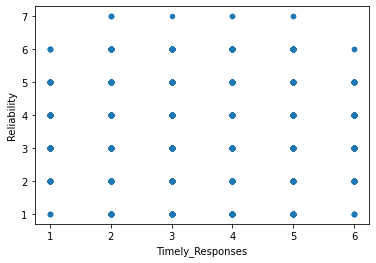

In [31]:
# Scatter plot of categorical variables TimelyResponse & Courteous
churn_bivariate[churn_bivariate['Timely_Responses'] < 7].plot.scatter(x='Timely_Responses',y='Reliability')